In [1]:
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
import sys
wd = '/ceph/ibmi/it/users/zabel/tsne/diss'
sys.path.insert(0, wd)

import pandas as pd
#import seaborn as sns

from tsne_jax import *

from utils import *
import matplotlib.pyplot as plt
#import tikzplotlib

from tueplots.constants.color import palettes

import scipy

plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
#plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
#plt.rcParams.update(fontsizes.aistats2022())
#plt.rcParams['axes.grid'] = False


In [2]:
def plot_matrix(M):
  for i, row in enumerate(M):
    s = ''
    for j, col in enumerate(row):
      s = s +'('+str(j)+','+str(i)+') ['+str(M[i, j])+'] '
    print(s)
    print('\n')

In [3]:
X = pd.read_csv('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/wt_featurecounts_log_qnorm.txt', header=0, sep='\t', index_col=0)

# Set the top x% threshold (e.g., top 50%)
top_percent = 5

# Calculate variance for each column
variances = X.var()

# Determine the cutoff variance value
cutoff = variances.quantile(1 - top_percent / 100)

# Filter columns with variance in the top x%
X = X.loc[:, variances >= cutoff]

N = np.identity(X.values.shape[0])
D = np.identity(X.values.shape[1])


#plt.plot(mean.iloc[0:3].var(axis=0))

In [4]:
X = pd.read_csv('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/wt_featurecounts_log_qnorm.txt', header=0, sep='\t', index_col=0)

# Step 1: Group every 3 rows (replicates) together
replicate_groups = np.repeat(np.arange(8), 3)  # 8 groups of 3 replicates each

# Step 2: Compute mean per group
df_mean = X.groupby(replicate_groups).mean()

# Step 3: Compute variance within each group of 3 replicates
# This results in a numpy array of shape (8, number of columns)
df_vars = X.groupby(replicate_groups).var()

# Set the top x% threshold (e.g., top 50%)
top_percent = 5

# Calculate variance for each column
variances = df_mean.var()

# Determine the cutoff variance value
cutoff = variances.quantile(1 - top_percent / 100)

# Filter columns with variance in the top x%
X = df_mean.loc[:, variances >= cutoff]

df_vars = df_vars.loc[:, variances >=cutoff]
flatten_vars, _ = flatten_util.ravel_pytree(df_vars.values)

#N = np.identity(X.values.shape[0])
input_cov = flatten_vars


(array([2.517e+03, 2.450e+02, 1.470e+02, 8.200e+01, 5.800e+01, 3.400e+01,
        3.600e+01, 1.600e+01, 1.200e+01, 1.000e+00, 4.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.        , 0.23166022, 0.46332043, 0.69498062, 0.92664087,
        1.15830112, 1.38996124, 1.62162149, 1.85328174, 2.08494186,
        2.31660223, 2.54826236, 2.77992249, 3.01158285, 3.24324298,
        3.47490335, 3.70656347, 3.9382236 , 4.16988373, 4.40154409,
        4.63320446, 4.86486435, 5.09652472, 5.32818508, 5.55984497,
        5.79150534]),
 <BarContainer object of 25 artists>)

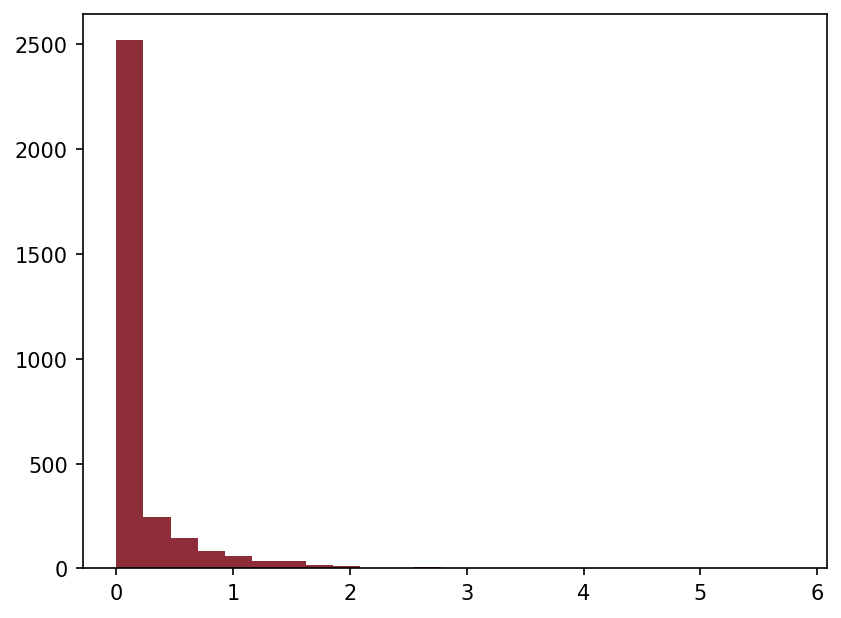

In [5]:
plt.hist(input_cov, 25)

In [2]:
labels_unique = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']
labels = labels_unique
#labels = ['t1', 't1', 't1','t2', 't2', 't2', 't3', 't3', 't3', 't4', 't4', 't4', 't5', 't5', 't5', 't6', 't6', 't6', 't7', 't7', 't7', 't8', 't8', 't8']

In [7]:
from openTSNE import TSNE
#X = scipy.stats.matrix_normal.rvs(mean, cov1, cov2)
X_array = X.values

#X, y = load_data(10)
key = random.PRNGKey(42)

y_guess = random.normal(key, shape=(X_array.shape[0], 2))
#
Y_star = tsne_fwd(X_array, y_guess)
#tsne = TSNE(verbose=True)
#Y_star = tsne.fit(X_array,)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X_array))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)

np.save('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/tsne_embedding.npy', Y_star)


Perplexity value 30 is too high. Using perplexity 2.33 instead


===> Finding 7 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=0.67 for 250 iterations...
Iteration   50, KL divergence 0.6197, 50 iterations in 0.2565 sec
Iteration  100, KL divergence 0.6292, 50 iterations in 0.2493 sec
Iteration  150, KL divergence 0.6289, 50 iterations in 0.2484 sec
Iteration  200, KL divergence 0.6290, 50 iterations in 0.2483 sec
Iteration  250, KL divergence 0.6290, 50 iterations in 0.2495 sec
   --> Time elapsed: 1.25 seconds
===> Running optimization with exaggeration=1.00, lr=8.00 for 750 iterations...
Iteration   50, KL divergence 0.0423, 50 iterations in 0.2468 sec
Iteration  100, KL divergence 0.0324, 50 iterations in 0.2478 sec
Iteration  150, KL divergence 0.0315, 50 iterations in 0.2507 sec
Iteration  200, KL divergence 0.0312, 50 iterations in 0.2467 sec
Iteration  250,

/tmp/ipykernel_736075/1789109321.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = plt.scatter(Y_star[inds, 0], Y_star[inds, 1], c = color_mapping[i], label=i)


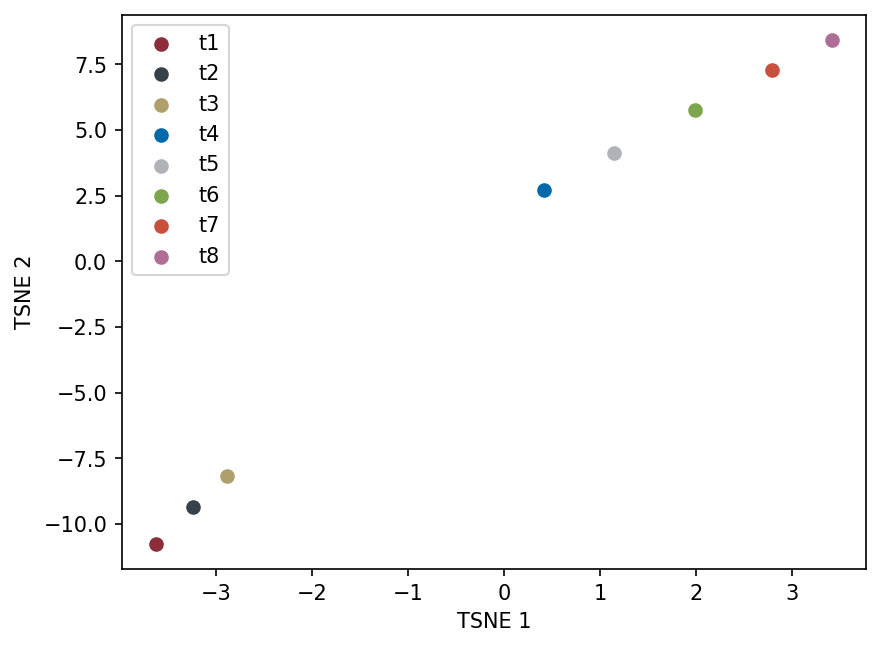

In [8]:
from matplotlib import colors

#cmap = plt.get_cmap('tab10')
#norm = colors.Normalize(vmin=0, vmax=len(labels_unique)-1)
#color_mapping = {label: cmap(norm(i)) for i, label in enumerate(labels_unique)}

cmap = palettes.tue_plot
color_mapping = {label: cmap[i] for i, label in enumerate(labels_unique)}


f = plt.figure()
for i in labels_unique:
  inds = [j == i for j in labels]
  scatter = plt.scatter(Y_star[inds, 0], Y_star[inds, 1], c = color_mapping[i], label=i)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
#plt.legend(handles=scatter.legend_elements(num=8)[0], labels=labels)
plt.legend()



In [9]:
KL_divergence_dy(X_flat, Y_flat, X_unflattener, Y_unflattener, perplexity=2.33)

Array([ 3.87910026e-04,  1.32239552e-03,  3.52516596e-04,  1.09549495e-03,
       -7.21094257e-04, -2.43912148e-03,  6.83877908e-04,  1.41510973e-03,
        1.64136989e-04,  3.88773391e-04, -4.31089429e-05, -4.07916959e-05,
        1.05640764e-04,  1.03961618e-04, -9.29870876e-04, -1.84580695e-03],      dtype=float32)

In [10]:
sensitivities = compute_sensitivities(X_flat, Y_flat, X_unflattener, Y_unflattener, 2.33)
np.save('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/sensitivities.npy', sensitivities)

In [11]:
sensitivities.shape

(16, 3168)

<Axes: >

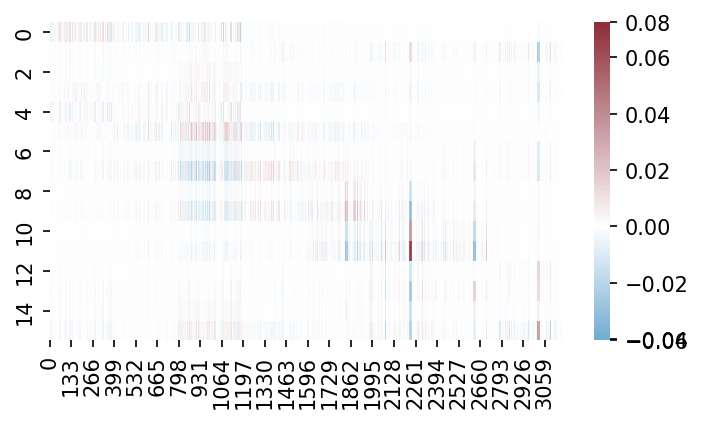

In [12]:
#import tikzplotlib
px = 1/plt.rcParams['figure.dpi']
cm = 1/2.54
plot_heatmap(sensitivities, figsize=(14*cm, 7*cm), with_cell_lines=False)
#tikzplotlib.save("sensitivities.pgf")

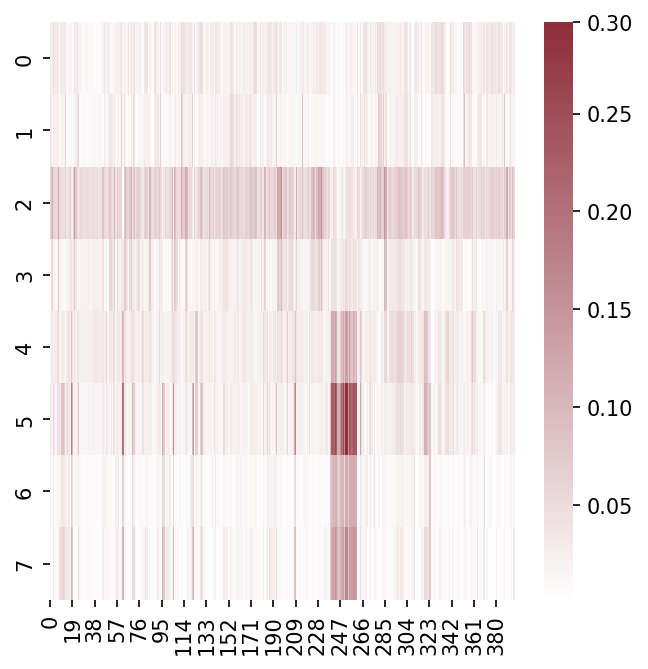

In [13]:
dy_dx_per_input = np.sum(np.abs(sensitivities), axis=0)
#f = plt.figure()
#plt.plot(np.sum(np.abs(dy_dx), axis=0))
dy_dx_per_input_reshaped = X_unflattener(dy_dx_per_input) + 1e-8
plot_heatmap(dy_dx_per_input_reshaped, with_cell_lines=False)
np.save('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/sensitivities_summarized.npy', dy_dx_per_input_reshaped)

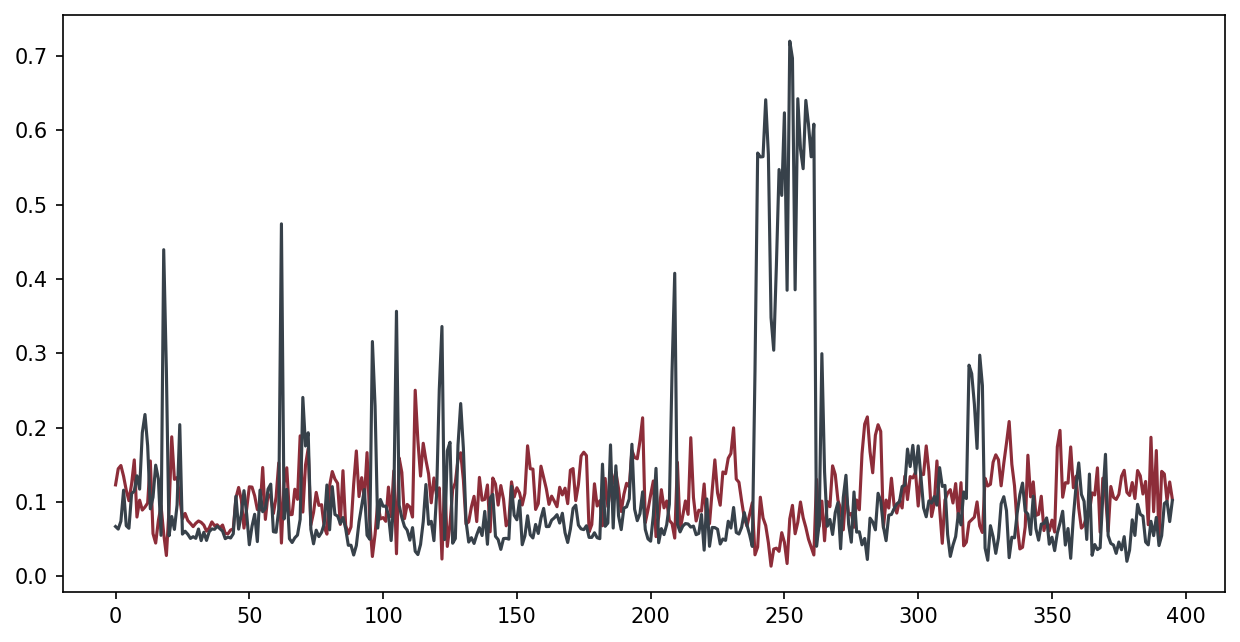

In [14]:
f = plt.figure(figsize=(10, 5))
dy_dx_per_input_group_t1_to_t3 = dy_dx_per_input_reshaped[0:3]
dy_dx_per_input_group_t4_to_t8 = dy_dx_per_input_reshaped[4:]
plt.plot(np.sum(dy_dx_per_input_group_t1_to_t3, axis=0))
plt.plot(np.sum(dy_dx_per_input_group_t4_to_t8, axis=0))

112
252


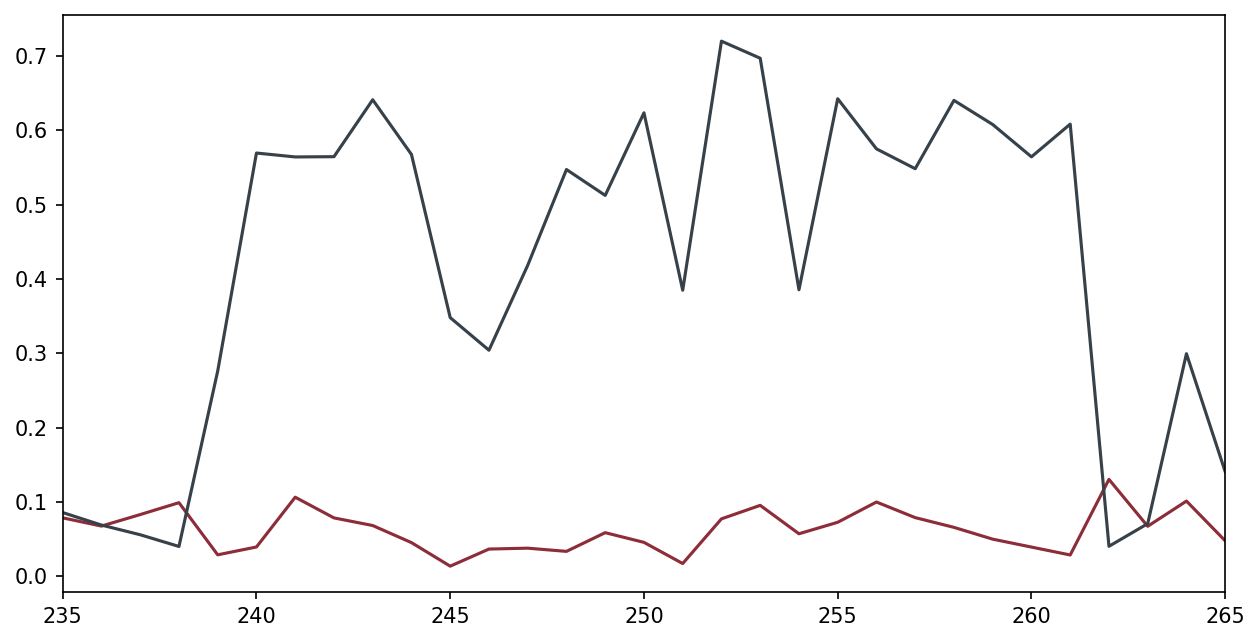

In [15]:
#dy_dx_per_input_group_t1_to_t3 = dy_dx_per_input_reshaped[0:8]
#dy_dx_per_input_group_t4_to_t8 = dy_dx_per_input_reshaped[9:]
#plt.plot(np.sum(dy_dx_per_input_group_t1_to_t3, axis=0))
#plt.plot(np.sum(dy_dx_per_input_group_t4_to_t8, axis=0))
#print(np.argmax(np.sum(dy_dx_per_input_group_t1_to_t3, axis=0)))
#print(np.argmax(np.sum(dy_dx_per_input_group_t4_to_t8, axis=0)))
dy_dx_per_input_group_t1_to_t3 = dy_dx_per_input_reshaped[0:3]
dy_dx_per_input_group_t4_to_t8 = dy_dx_per_input_reshaped[4:]
f = plt.figure(figsize=(10, 5))
plt.plot(np.sum(dy_dx_per_input_group_t1_to_t3, axis=0))
plt.plot(np.sum(dy_dx_per_input_group_t4_to_t8, axis=0))
plt.xlim((235, 265))
print(np.argmax(np.sum(dy_dx_per_input_group_t1_to_t3, axis=0)))
print(np.argmax(np.sum(dy_dx_per_input_group_t4_to_t8, axis=0)))


In [16]:
print(X.columns[range(240, 262)])
len(X.columns[range(240, 262)])

Index(['CAC37459', 'CAC37460', 'CAC37461', 'CAC37462', 'CAD55222', 'CAC44189',
       'CAC44190', 'CAC44191', 'CAC44192', 'CAC44193', 'CAC44194', 'CAC44195',
       'CAC44196', 'CAC44197', 'CAC44198', 'CAC44199', 'CAC44200', 'CAC44201',
       'CAC44202', 'CAC44203', 'CAC44204', 'CAC44205'],
      dtype='object')


22

Das sind alles Gene vom actinorhodin BCG from S. coelicolor (BGC0000194). Genau aus diesen Gene besteht der BGC! https://mibig.secondarymetabolites.org/repository/BGC0000194.5/index.html#r1c1

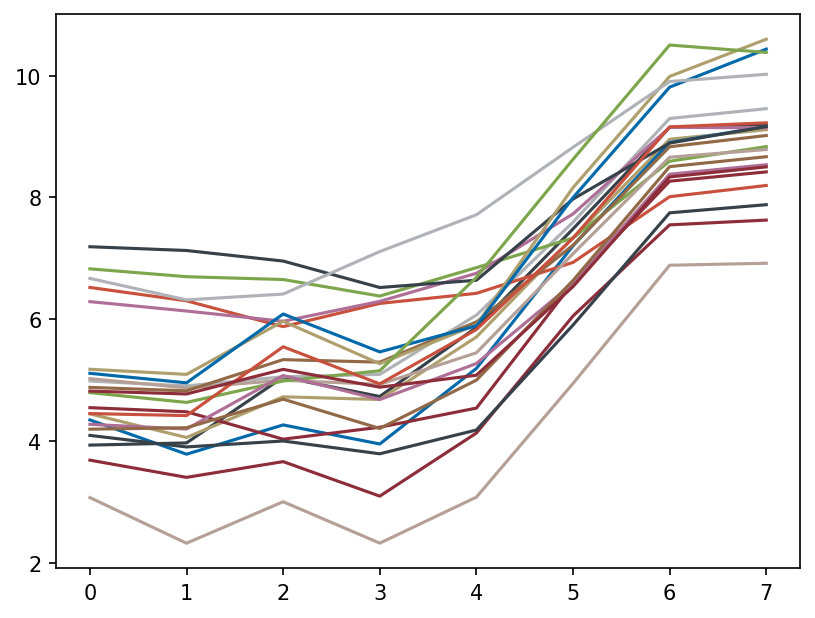

In [17]:
for i in range(240, 262):
  plt.plot(X.values[:, i])

In [18]:
actinorhodin = X.values[:, np.arange(240, 262)]
#np.save('results/actinorhodin.npy', actinorhodin)

[252 253 255 243 258 250 261 259 256 240 244 242 260 241 257 248 249  62
  18 247 209 254 251 105 245 122  96 246 264 323]
[np.int64(62), np.int64(18), np.int64(209), np.int64(105), np.int64(122), np.int64(96)]
CAB61590
CAB55677
CAC04256
CAB46410
CAB69766
CAC28543


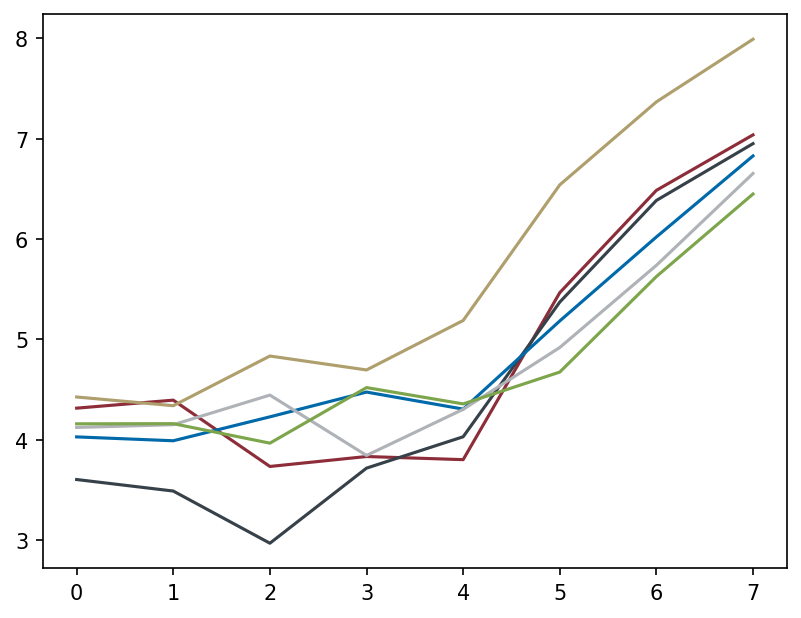

In [19]:
a = np.sum(dy_dx_per_input_group_t4_to_t8, axis=0)
K = 30
out = np.argsort(-a)[:K]
print(out)
print([i for i in out if i<240])
for j in [i for i in out if i<240]:
  print(X.columns[j])
  plt.plot(X.values[:, j])

In [20]:
cov_final = compute_cov_without_kronecker(X_flat, Y_flat, X_unflattener, Y_unflattener, input_cov, 2.33)
cov_final = cov_final + 1e-3*np.eye(len(cov_final))

<Axes: >

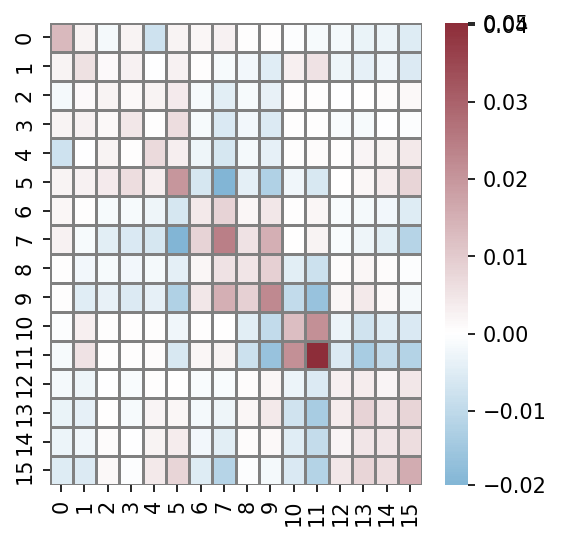

In [21]:
plot_heatmap(cov_final, figsize=(4, 4))

(16, 15)


Text(0, 0.5, 'TSNE 2')

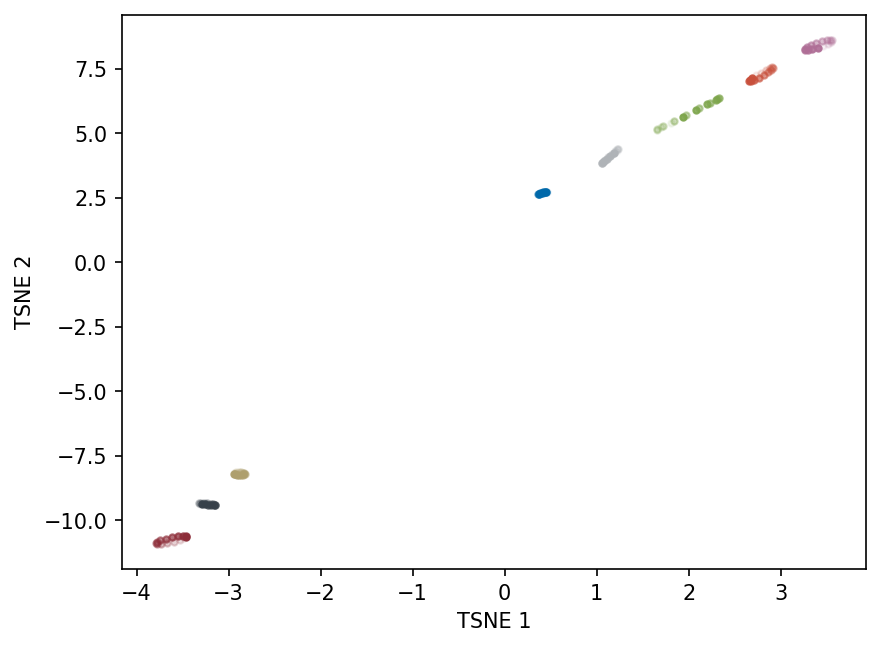

In [43]:
from utils import equipotential_standard_normal

n_samples = 15
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure(1)
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=palettes.tue_plot[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

In [45]:
np.save('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/samples_for_animation.npy', samples)

In [3]:
samples = np.load('/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/samples_for_animation.npy')

[0 1 2 3 4 5 6 7]
[array([0.55294118, 0.17647059, 0.22352941]), array([0.21568627, 0.25490196, 0.29019608]), array([0.68235294, 0.62352941, 0.42745098]), array([0.        , 0.41176471, 0.66666667]), array([0.68627451, 0.70196078, 0.71764706]), array([0.49019608, 0.64705882, 0.29411765]), array([0.78431373, 0.31372549, 0.23529412]), array([0.68627451, 0.43137255, 0.58823529])]
['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']


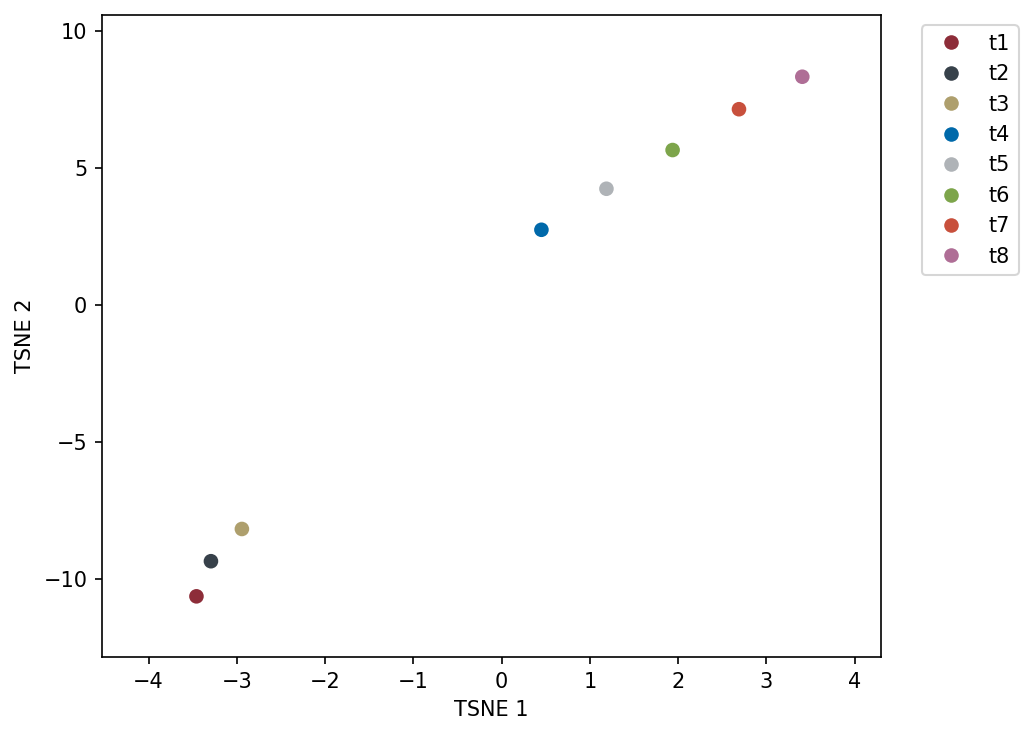

In [5]:
from tueplots import cycler, fonts, fontsizes, bundles
from tueplots.constants import markers
from tueplots.constants.color import palettes
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter


def animate(samples, labels, output, cmap):
    plt.rcParams.update(cycler.cycler(color=palettes.tue_plot))
    #plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
    #plt.rcParams.update(fontsizes.aistats2022())
    plt.rcParams['axes.grid'] = False

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    cs = le.fit_transform(labels)
    print(cs)
    cs = [palettes.tue_plot[i] for i in cs]
    print(cs)
    labels_set = list(dict.fromkeys(labels))
    print(labels_set)

    fig, ax = plt.subplots(figsize=(7, 5))
    sample_0 = samples[:, 0]
    sample_0 = sample_0.reshape((len(labels), 2))
    minimum_x = np.min(np.array([i.reshape((len(labels), 2)) for i in samples.T])[:, :, 0])
    maximum_x = np.max(np.array([i.reshape((len(labels), 2)) for i in samples.T])[:, :, 0])
    minimum_y = np.min(np.array([i.reshape((len(labels), 2)) for i in samples.T])[:, :, 1])
    maximum_y = np.max(np.array([i.reshape((len(labels), 2)) for i in samples.T])[:, :, 1])
    ax.set_xlim((minimum_x - (0.1 * (maximum_x - minimum_x)), maximum_x + (0.1 * (maximum_x - minimum_x))))
    ax.set_ylim((minimum_y - (0.1 * (maximum_y - minimum_y)), maximum_y + (0.1 * (maximum_y - minimum_y))))
    ax.set_xlabel('TSNE 1')
    ax.set_ylabel('TSNE 2')
    scat = ax.scatter(sample_0[:, 0], sample_0[:, 1], c=cs)
    # Manually create a legend
    legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cs[i], markersize=8, label=label)
                  for i, label in enumerate(labels_set)]
    ax.legend(handles=legend_patches, bbox_to_anchor=(1.04, 1), loc="upper left")    
    plt.tight_layout()

    def init():
        return scat,

    def animate(i):
        sample_i = samples[:, i]
        sample_i = sample_i.reshape((len(labels), 2))
        scat.set_offsets(sample_i)
        return scat, 
        
    anim = FuncAnimation(
        fig, animate, interval=1000, frames=samples.shape[1], blit=True, init_func=init)
        
 
    #anim.save("ifd_results/ifd.mov", dpi=150, writer=FFMpegWriter(fps=5))
    #anim.save("laplace_approximation/laplace.mov", dpi=150, writer=FFMpegWriter(fps=5))
    #anim.save("laplace_approximation/laplace.gif", dpi=150, writer=PillowWriter(fps=1000))
    anim.save(output, dpi=150, writer=PillowWriter(fps=5))
    # Currently used
    # first option
    #anim = FuncAnimation(
    #    fig, animate, interval=1000, frames=40, blit=True, init_func=init)
    #anim.save(output, dpi=150, writer=FFMpegWriter(fps=2))

    # second option
    # anim = FuncAnimation(
    #     fig, animate, interval=200, frames=40, blit=True, init_func=init)
    # with open(output, "w") as f:
    #     print(anim.to_html5_video(), file=f)
animate(samples, labels, '/ceph/ibmi/it/users/zabel/tsne/diss/datasets/Scoelicolor/results/M145/animation_new.gif', cmap=palettes.tue_plot)

(16, 20)


Text(0, 0.5, 'TSNE 2')

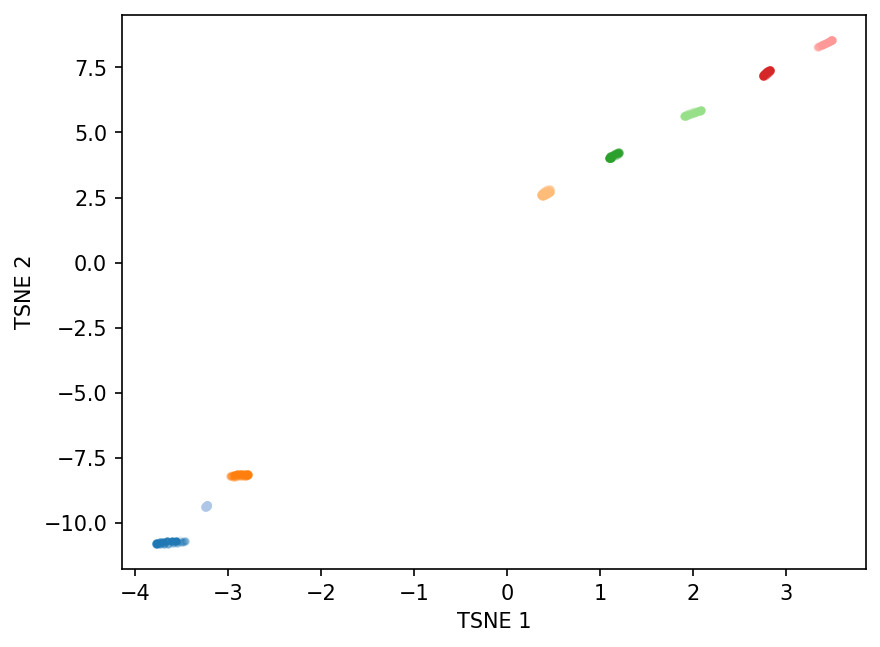

In [25]:
import matplotlib.pyplot as plt
# Get the tab20 colormap
tab20 = plt.get_cmap('tab20')

# Extract colors as a list of RGB tuples
colors = [tab20(i) for i in range(tab20.N)]

n_samples = 20
y_int = [i for i in range(Y_star.shape[0])]
S = equipotential_standard_normal_within_one_std(2 * Y_star.shape[0], n_samples)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_flat)
print(samples.shape)

fig = plt.figure()
for j, sample in enumerate(samples.T):
    sample = Y_unflattener(sample)
    for i, s in enumerate(sample): 
        plt.plot(s[0], s[1], c=colors[i], alpha=[i for i in np.arange(0.1, 1, 1/(n_samples+2))][j], marker='.')
               #marker=list(Line2D.markers.keys())[j])
#plt.axis('equal')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

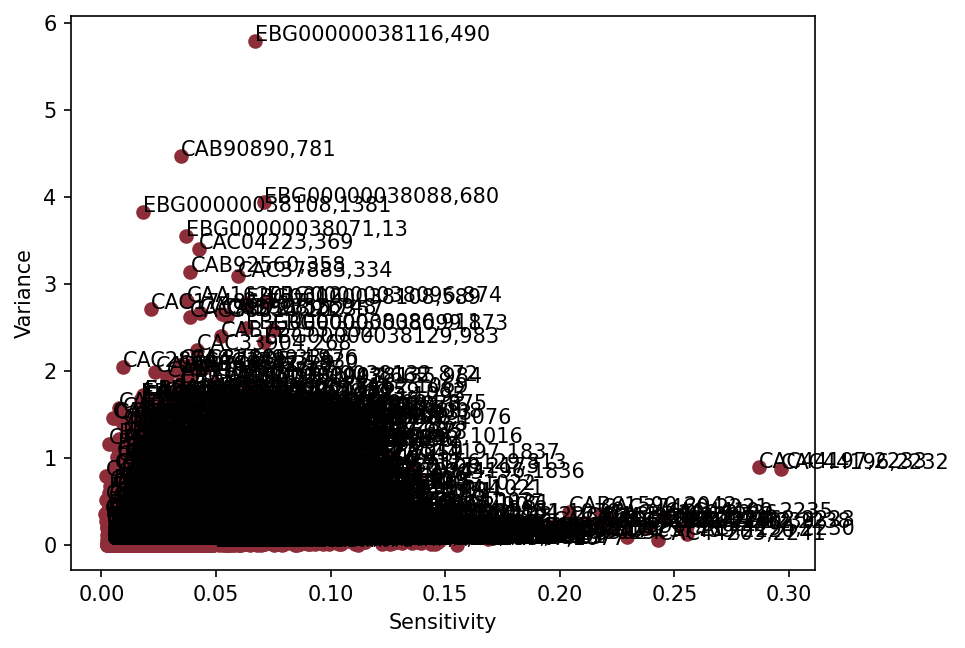

In [26]:
plt.scatter(dy_dx_per_input, flatten_vars)
gene_names_subset = np.array(np.repeat(X.columns, 8)).reshape(396, 8).flatten("F")
for i, txt in enumerate(gene_names_subset):
    plt.annotate(txt+','+str(i), (dy_dx_per_input[i], flatten_vars[i]))
    plt.xlabel('Sensitivity')
    plt.ylabel('Variance')

In [27]:
selected_data = pd.read_csv('/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/selected_data.txt')
selected_data = selected_data.values
#labels = pd.read_csv('datasets/Thcells/labels.txt', header=None)
#labels = labels.values.flatten().tolist()
key = random.PRNGKey(41)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(selected_data.shape[0], 2))
#Y_star = TSNE(n_components=2, learning_rate=200, init=onp.array(y_guess), perplexity=30).fit_transform(X)
selected_data_tsne = tsne_fwd(selected_data, y_guess)

FileNotFoundError: [Errno 2] No such file or directory: '/local_scratch.old/zabel/tsne/diss/datasets/Scoelicolor/selected_data.txt'